In [1]:
from matplotlib import pyplot as plt

In [2]:
import grad_desc as gd
import pprint
from datetime import datetime

# **1 e 2**

## "Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna)."

## "Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente."

In [3]:
results = gd.run(messages = True)

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
Running Gradient Descent using the number of iterations as a stoping condition
For values of:
b = 0.010029093861364507
m = 0.17483245665563385
The RSS is 2648.2381266261386
For values of:
b = 0.019496718042658713
m = 0.3402328195038894
The RSS is 2381.1735926230144
For values of:
b = 0.028433167538002242
m = 0.4967100089829696
The RSS is 2142.151013653971
For values of:
b = 0.03686710273711365
m = 0.6447454860906212
The RSS is 1928.2259499305476
For values of:
b = 0.044825637622440746
m = 0.7847947339926804
The RSS is 1736.7631314659504
For values of:
b = 0.052334423207504185
m = 0.9172886596895711
The RSS is 1565.4039948653665
For values of:
b = 0.059417726473220564
m = 1.0426349200541294
The RSS is 1412.0376287932477
For values of:
b = 0.06609850504511722
m = 1.1612191763213948
The RSS is 1274.7747702022896
For values of:
b = 0.07239847784124424
m = 1.2734062808908309
The RSS is 1151.924530990372
For val

# **3**

## "O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações."

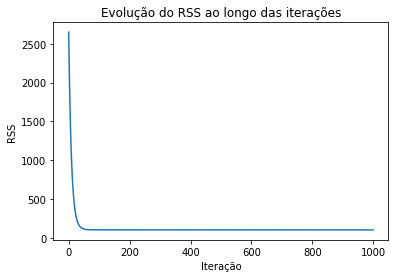

In [4]:
plt.plot(range(results["n_iterations"]), results['RSS'])
plt.title("Evolução do RSS ao longo das iterações")
plt.xlabel("Iteração")
plt.ylabel("RSS")
plt.show()

O RSS diminui com as iterações.

# **4**

## Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

Após algumas explorações, encontramos os valores de
learning rate = 0.00097
Número de Iterações = 15000

Que possuem os valores mais aproximados w0 e w1 de -39 e 5 respectivamente.

In [5]:
results = gd.run(messages = False, learning_rate = 0.00097, num_iterations=15000)

print("b: ", results['b'])
print("m: ", results['m'])

Running Gradient Descent using the number of iterations as a stoping condition
b:  -29.51219341084838
m:  5.00812837930294


# **5**

## O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.

Running Gradient Descent using the norm's size as a stoping condition


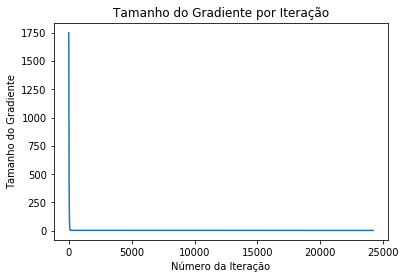

In [6]:
results = gd.run(messages = False, learning_rate = 0.0001,
                running_mode = 2, gradient_threshold = 3)

plt.plot(range(results["n_iterations"]), results["gradient_norms"])
plt.title("Tamanho do Gradiente por Iteração")
plt.xlabel("Número da Iteração")
plt.ylabel("Tamanho do Gradiente")
plt.show()

Configurando um limite inferior de 3 para o tamanho do gradiente, podemos observar na visualização acima que o mesmo diminui até atingir nosso critério de convergência. Como o valor inicial do gradiente é muito alto, a visualização é prejudicada. Aplicando então uma função logaritmica, podemos visualizar melhor a evolução destes valores.

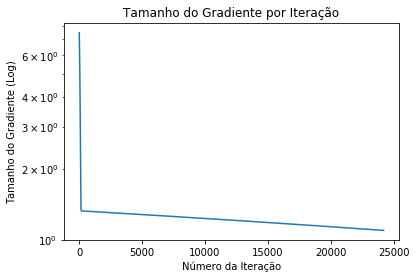

In [7]:
import math

plt.plot(range(results["n_iterations"]), list(map(math.log, results["gradient_norms"])))
plt.yscale('log')
plt.title("Tamanho do Gradiente por Iteração")
plt.xlabel("Número da Iteração")
plt.ylabel("Tamanho do Gradiente (Log)")
plt.show()

# **6**

## Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

Fixando o valor da *learning rate* no encontrado no item 4, faremos uma exploração de limites
até um ponto que seja razoável.

Podemos ter uma ideia de que quando o limite para o tamanho do gradiente se aproxima de 40, obtemos os valores desejados.

De fato, podemos ver que ao executarmos o algoritmo com um limite de 39, obteremos:

Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Descent using the norm's size as a stoping condition
Running Gradient Des

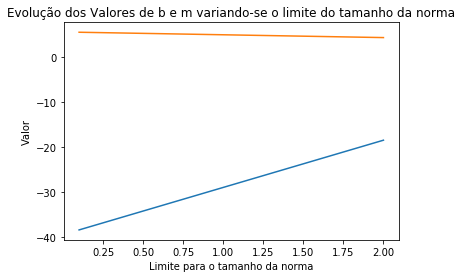

In [8]:
threshold_range = []
b_range = []
m_range = []

threshold = 2

start_timestamp = datetime.now()
while True:
    threshold_range.append(threshold)
    results = gd.run(messages = False, learning_rate = 0.001,
                running_mode = 2, gradient_threshold = threshold)
    
    b_range.append(results['b'])
    m_range.append(results['m'])
    
    # Fazemos o teste utilizando uma tolerância de 1 unidade de diferença
    if(abs(results['b'] - (-39)) <= 1 and abs(results['m'] - 5) <= 1):
        ending_timestamp = datetime.now()
        print("Após alguma experimentação, fixando um learning rate de 0.001, chegamos a um threshold de : ", threshold)
        break
        
    threshold -= 0.05

grad_threshold_running_time = (ending_timestamp - start_timestamp)

plt.plot(threshold_range, b_range)
plt.plot(threshold_range, m_range)
plt.title("Evolução dos Valores de b e m variando-se o limite do tamanho da norma")
plt.xlabel("Limite para o tamanho da norma")
plt.ylabel("Valor")
plt.show()

# **7**

## Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

Implementando as equações normais, obtemos um resultado ótimo de forma rápida.

In [9]:
start_timestamp = datetime.now()
results = gd.run(messages = False, running_mode = 3)
ending_timestamp = datetime.now()
normal_equations_running_time = (ending_timestamp - start_timestamp)

print("b: {0}\nm: {1}".format(results['b'], results['m']))

Running Gradient Descent using the normal equations
b: -39.44625667909617
m: 5.599482874119919


De fato, se compararmos os valores, vemos que há uma melhora considerável no desempenho.

In [10]:
print("Gradiente com limite por tamanho da norma: ", grad_threshold_running_time)
print("Equações normais: ", normal_equations_running_time)

Gradiente com limite por tamanho da norma:  0:00:34.786909
Equações normais:  0:00:00.002942
